<a href="https://colab.research.google.com/github/Sachira-Heshan/omic-data-and-machine-learning-in-the-identification-of-coronary-artery-disease/blob/main/random_forest_models_with_combined_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Research/Datasets/Cleaned/combined-standardized-datasets-GSE230165-n-GSE198885.xlsx')

In [ ]:
df.head()

,Unnamed: 0,hsa-miR-141-3p,hsa-miR-30d-5p,hsa-miR-30e-3p,hsa-miR-424-5p,hsa-miR-16-5p,hsa-miR-193a-5p,hsa-miR-146a-5p,hsa-miR-425-3p,hsa-miR-339-3p,...,hsa-miR-16-2-3p,hsa-miR-148a-3p,hsa-miR-320d,hsa-miR-125a-5p,hsa-miR-192-5p,hsa-let-7g-5p,hsa-miR-130a-3p,hsa-miR-324-5p,hsa-miR-877-5p,target_value
0,0,4.911135e-15,2.648912,2.979053,3.876892,1.995464,2.448125,3.274034,1.847582,3.020273e+00,...,2.737664,3.345582,2.594436,2.519414,2.157888,3.276842,2.810912,2.822042e+00,1.672030,0
1,1,-1.191489e+00,-0.628119,-0.394710,-0.301768,-0.682815,0.127080,-0.576721,-0.544769,-1.157030e+00,...,-0.631472,0.046928,-0.827257,-0.253775,-0.175553,-0.526663,-0.870075,-7.010168e-01,-0.248886,0
2,2,-3.413370e-01,-0.432475,0.067175,-0.467259,-0.025056,-0.266722,0.390135,-0.814607,-6.044134e-01,...,-0.170120,-0.127001,-0.537098,-0.386163,-0.126804,-0.071896,-0.985622,-3.002456e-01,-0.048927,0
3,3,4.911135e-15,1.018548,0.241218,1.187655,0.705384,1.606821,-0.082180,0.718866,2.111061e-15,...,1.357842,1.276426,1.116264,0.296682,0.688926,1.127035,1.882412,3.311222e-15,0.823024,0
4,4,3.429320e-01,0.540308,0.027011,0.463630,0.396492,0.347848,0.495711,1.432951,5.661821e-01,...,0.473232,0.700661,0.420976,0.261843,0.461431,0.791128,0.813605,1.396042e+00,0.088749,0


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,hsa-miR-141-3p,hsa-miR-30d-5p,hsa-miR-30e-3p,hsa-miR-424-5p,hsa-miR-16-5p,hsa-miR-193a-5p,hsa-miR-146a-5p,hsa-miR-425-3p,hsa-miR-339-3p,hsa-miR-409-3p,...,hsa-miR-16-2-3p,hsa-miR-148a-3p,hsa-miR-320d,hsa-miR-125a-5p,hsa-miR-192-5p,hsa-let-7g-5p,hsa-miR-130a-3p,hsa-miR-324-5p,hsa-miR-877-5p,target_value
0,4.911135e-15,2.648912,2.979053,3.876892,1.995464,2.448125,3.274034,1.847582,3.020273e+00,0.425197,...,2.737664,3.345582,2.594436,2.519414,2.157888,3.276842,2.810912,2.822042e+00,1.672030,0
1,-1.191489e+00,-0.628119,-0.394710,-0.301768,-0.682815,0.127080,-0.576721,-0.544769,-1.157030e+00,-1.315034,...,-0.631472,0.046928,-0.827257,-0.253775,-0.175553,-0.526663,-0.870075,-7.010168e-01,-0.248886,0
2,-3.413370e-01,-0.432475,0.067175,-0.467259,-0.025056,-0.266722,0.390135,-0.814607,-6.044134e-01,-0.227389,...,-0.170120,-0.127001,-0.537098,-0.386163,-0.126804,-0.071896,-0.985622,-3.002456e-01,-0.048927,0
3,4.911135e-15,1.018548,0.241218,1.187655,0.705384,1.606821,-0.082180,0.718866,2.111061e-15,0.094721,...,1.357842,1.276426,1.116264,0.296682,0.688926,1.127035,1.882412,3.311222e-15,0.823024,0
4,3.429320e-01,0.540308,0.027011,0.463630,0.396492,0.347848,0.495711,1.432951,5.661821e-01,-0.461651,...,0.473232,0.700661,0.420976,0.261843,0.461431,0.791128,0.813605,1.396042e+00,0.088749,0


In [ ]:
df['target_value'].value_counts()

1    54
0    36
Name: target_value, dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# seperate features and targets
X = df.drop(columns=["target_value"])
y = df["target_value"]

In [ ]:
X.head()

,hsa-miR-141-3p,hsa-miR-30d-5p,hsa-miR-30e-3p,hsa-miR-424-5p,hsa-miR-16-5p,hsa-miR-193a-5p,hsa-miR-146a-5p,hsa-miR-425-3p,hsa-miR-339-3p,hsa-miR-409-3p,...,hsa-miR-484,hsa-miR-16-2-3p,hsa-miR-148a-3p,hsa-miR-320d,hsa-miR-125a-5p,hsa-miR-192-5p,hsa-let-7g-5p,hsa-miR-130a-3p,hsa-miR-324-5p,hsa-miR-877-5p
0,4.911135e-15,2.648912,2.979053,3.876892,1.995464,2.448125,3.274034,1.847582,3.020273e+00,0.425197,...,2.946397,2.737664,3.345582,2.594436,2.519414,2.157888,3.276842,2.810912,2.822042e+00,1.672030
1,-1.191489e+00,-0.628119,-0.394710,-0.301768,-0.682815,0.127080,-0.576721,-0.544769,-1.157030e+00,-1.315034,...,-0.929409,-0.631472,0.046928,-0.827257,-0.253775,-0.175553,-0.526663,-0.870075,-7.010168e-01,-0.248886
2,-3.413370e-01,-0.432475,0.067175,-0.467259,-0.025056,-0.266722,0.390135,-0.814607,-6.044134e-01,-0.227389,...,-0.456444,-0.170120,-0.127001,-0.537098,-0.386163,-0.126804,-0.071896,-0.985622,-3.002456e-01,-0.048927
3,4.911135e-15,1.018548,0.241218,1.187655,0.705384,1.606821,-0.082180,0.718866,2.111061e-15,0.094721,...,1.866529,1.357842,1.276426,1.116264,0.296682,0.688926,1.127035,1.882412,3.311222e-15,0.823024
4,3.429320e-01,0.540308,0.027011,0.463630,0.396492,0.347848,0.495711,1.432951,5.661821e-01,-0.461651,...,0.644352,0.473232,0.700661,0.420976,0.261843,0.461431,0.791128,0.813605,1.396042e+00,0.088749


In [ ]:
# building model with algorithm Random Forest and feature selection using mutual information

In [ ]:
# feature selection using mutual information
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# mutual information selector
mi_classi_75 = SelectKBest(score_func=mutual_info_classif, k=75)

# apply the mutual information selector on the dataset
X_MI_75 = mi_classi_75.fit_transform(X, y)

# get the selected 75 features
selected_features_75 = mi_classi_75.get_support()

# feature names of selected features
selected_feature_names_75 = X.columns[selected_features_75]

X_new_75 = X[selected_feature_names_75]

print("Shape of X_new_75: ", X_new_75.shape)

# divide the dataset to train 0.8 and test 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new_75, y, test_size=0.2, random_state=42)

# create Random Forest classifier and train the data
from sklearn.ensemble import RandomForestClassifier
rf_classifier_75 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_75.fit(X_train, y_train)

# test the model on test set
y_pred_75 = rf_classifier_75.predict(X_test)

# evaluate the model using accuracy, classification_report and sensitivity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# let's check the accuracy of the model
accuracy_rf_75_MI = accuracy_score(y_test, y_pred_75)
print(f"Accuracy of the MI 75 Random Forest model is: {round(accuracy_rf_75_MI*100, 3)}%")

# confusion matrix of the model
confusion_matrix_rf_75_MI = confusion_matrix(y_test, y_pred_75)

TP_rf_75 = confusion_matrix_rf_75_MI[1, 1]  # True Positives
FN_rf_75 = confusion_matrix_rf_75_MI[1, 0]  # False Negatives

# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity_rf_75 = TP_rf_75 / (TP_rf_75 + FN_rf_75)
print(f"Sensitivity for 75 features and Random Forest model (True Positive Rate): {round(sensitivity_rf_75*100, 3)}%")

# print the confusion matrix
print("Confusion matrix of the MI 75 Random Forest model is: ")
print(confusion_matrix_rf_75_MI)

# classification report for the
report_rf_75 = classification_report(y_test, y_pred_75)
print("Classification report of MI 75 Random Forest model is: ")
print(report_rf_75)

Shape of X_new_75:  (90, 75)
Accuracy of the MI 75 Random Forest model is: 55.556%
Sensitivity for 75 features and Random Forest model (True Positive Rate): 72.727%
Confusion matrix of the MI 75 Random Forest model is: 
[[2 5]
 [3 8]]
Classification report of MI 75 Random Forest model is: 
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.62      0.73      0.67        11

    accuracy                           0.56        18
   macro avg       0.51      0.51      0.50        18
weighted avg       0.53      0.56      0.54        18



In [ ]:
# Get feature importances
feature_importances_75 = rf_classifier_75.feature_importances_

In [ ]:
# Create a list of (feature_name, feature_importance) tuples
feature_importance_tuples_75 = [(feature_name, importance) for feature_name, importance in zip(selected_feature_names_75, feature_importances_75)]

# Sort the list of tuples by feature importance in ascending order
sorted_feature_importance_tuples_75 = sorted(feature_importance_tuples_75, key=lambda x: x[1])

# Extract the sorted feature indices and importances
sorted_feature_names_75, sorted_feature_importances_75 = zip(*sorted_feature_importance_tuples_75)

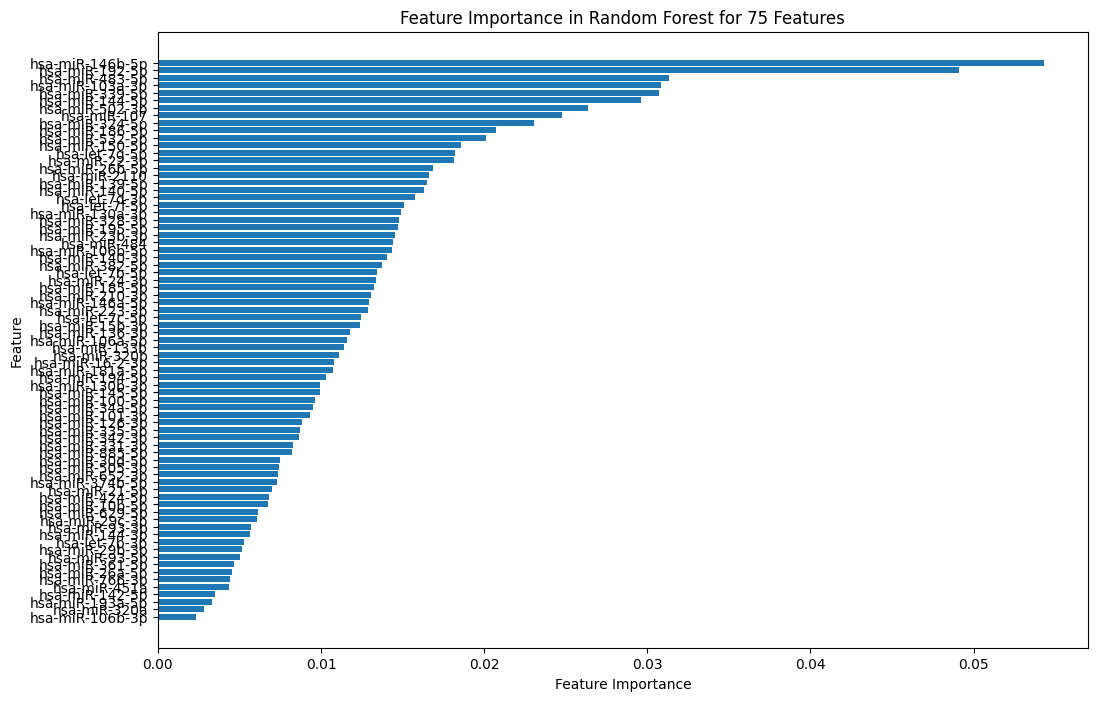

In [ ]:
# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_feature_importances_75)), sorted_feature_importances_75, align='center')
plt.yticks(range(len(sorted_feature_importances_75)), sorted_feature_names_75)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest for 75 Features')
plt.show()

In [ ]:
# try for k = 5 in k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

print("5-fold Cross Validation")

# assign the model built earlier to variable model
model = rf_classifier_75

# Define the number of folds (k) for cross-validation
k = 5

# Create a cross-validation object (K-Fold cross-validator)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the cross-validation scores
# we use accuracy as the scoring metric here
scores = cross_val_score(model, X_new_75, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Accuracy: {round(scores.mean()*100, 3)}%")
print(f"Standard Deviation: {round(scores.std()*100, 3)}%")

5-fold Cross Validation
Cross-Validation Scores: [0.44444444 0.72222222 0.61111111 0.5        0.77777778]
Mean Accuracy: 61.111%
Standard Deviation: 12.669%


In [ ]:
# try for k = 8 in k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

print("8-fold Cross Validation")

# assign the model built earlier to variable model
model = rf_classifier_75

# Define the number of folds (k) for cross-validation
k = 8

# Create a cross-validation object (K-Fold cross-validator)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the cross-validation scores
# we use accuracy as the scoring metric here
scores = cross_val_score(model, X_new_75, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Accuracy: {round(scores.mean()*100, 3)}%")
print(f"Standard Deviation: {round(scores.std()*100, 3)}%")

8-fold Cross Validation
Cross-Validation Scores: [0.58333333 0.66666667 1.         0.72727273 0.63636364 0.54545455
 0.81818182 0.63636364]
Mean Accuracy: 70.17%
Standard Deviation: 13.757%


In [ ]:
# try for k = 10 in k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

print("10-fold Cross Validation")

# assign the model built earlier to variable model
model = rf_classifier_75

# Define the number of folds (k) for cross-validation
k = 10

# Create a cross-validation object (K-Fold cross-validator)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the cross-validation scores
# we use accuracy as the scoring metric here
scores = cross_val_score(model, X_new_75, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Accuracy: {round(scores.mean()*100, 3)}%")
print(f"Standard Deviation: {round(scores.std()*100, 3)}%")

10-fold Cross Validation
Cross-Validation Scores: [0.44444444 0.55555556 0.66666667 0.77777778 1.         0.33333333
 0.22222222 0.66666667 0.55555556 0.66666667]
Mean Accuracy: 58.889%
Standard Deviation: 21.111%


In [ ]:
# try with 25 features selected using mutual information

In [24]:
# feature selection using mutual information
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# mutual information selector
mi_classi_25 = SelectKBest(score_func=mutual_info_classif, k=25)

# apply the mutual information selector on the dataset
X_MI_25 = mi_classi_25.fit_transform(X, y)

# get the selected 25 features
selected_features_25 = mi_classi_25.get_support()

# feature names of selected features
selected_feature_names_25 = X.columns[selected_features_25]

X_new_25 = X[selected_feature_names_25]

print("Shape of X_new_25: ", X_new_25.shape)

# divide the dataset to train 0.8 and test 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new_25, y, test_size=0.2, random_state=42)

# create Random Forest classifier and train the data
from sklearn.ensemble import RandomForestClassifier
rf_classifier_25 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_25.fit(X_train, y_train)

# test the model on test set
y_pred_25 = rf_classifier_25.predict(X_test)

# evaluate the model using accuracy, classification_report and sensitivity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# let's check the accuracy of the model
accuracy_rf_25_MI = accuracy_score(y_test, y_pred_25)
print(f"Accuracy of the MI 25 Random Forest model is: {round(accuracy_rf_25_MI*100, 3)}%")

# confusion matrix of the model
confusion_matrix_rf_25_MI = confusion_matrix(y_test, y_pred_25)

TP_rf_25 = confusion_matrix_rf_25_MI[1, 1]  # True Positives
FN_rf_25 = confusion_matrix_rf_25_MI[1, 0]  # False Negatives

# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity_rf_25 = TP_rf_25 / (TP_rf_25 + FN_rf_25)
print(f"Sensitivity for 25 features and Random Forest model (True Positive Rate): {round(sensitivity_rf_25*100, 3)}%")

# print the confusion matrix
print("Confusion matrix of the MI 25 Random Forest model is: ")
print(confusion_matrix_rf_25_MI)

# classification report for the
report_rf_25 = classification_report(y_test, y_pred_25)
print("Classification report of MI 25 Random Forest model is: ")
print(report_rf_25)

Shape of X_new_25:  (90, 25)
Accuracy of the MI 25 Random Forest model is: 77.778%
Sensitivity for 25 features and Random Forest model (True Positive Rate): 90.909%
Confusion matrix of the MI 25 Random Forest model is: 
[[ 4  3]
 [ 1 10]]
Classification report of MI 25 Random Forest model is: 
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.77      0.91      0.83        11

    accuracy                           0.78        18
   macro avg       0.78      0.74      0.75        18
weighted avg       0.78      0.78      0.77        18



In [25]:
# Get feature importances
feature_importances_25 = rf_classifier_25.feature_importances_

In [26]:
# Create a list of (feature_name, feature_importance) tuples
feature_importance_tuples_25 = [(feature_name, importance) for feature_name, importance in zip(selected_feature_names_25, feature_importances_25)]

# Sort the list of tuples by feature importance in ascending order
sorted_feature_importance_tuples_25 = sorted(feature_importance_tuples_25, key=lambda x: x[1])

# Extract the sorted feature indices and importances
sorted_feature_names_25, sorted_feature_importances_25 = zip(*sorted_feature_importance_tuples_25)

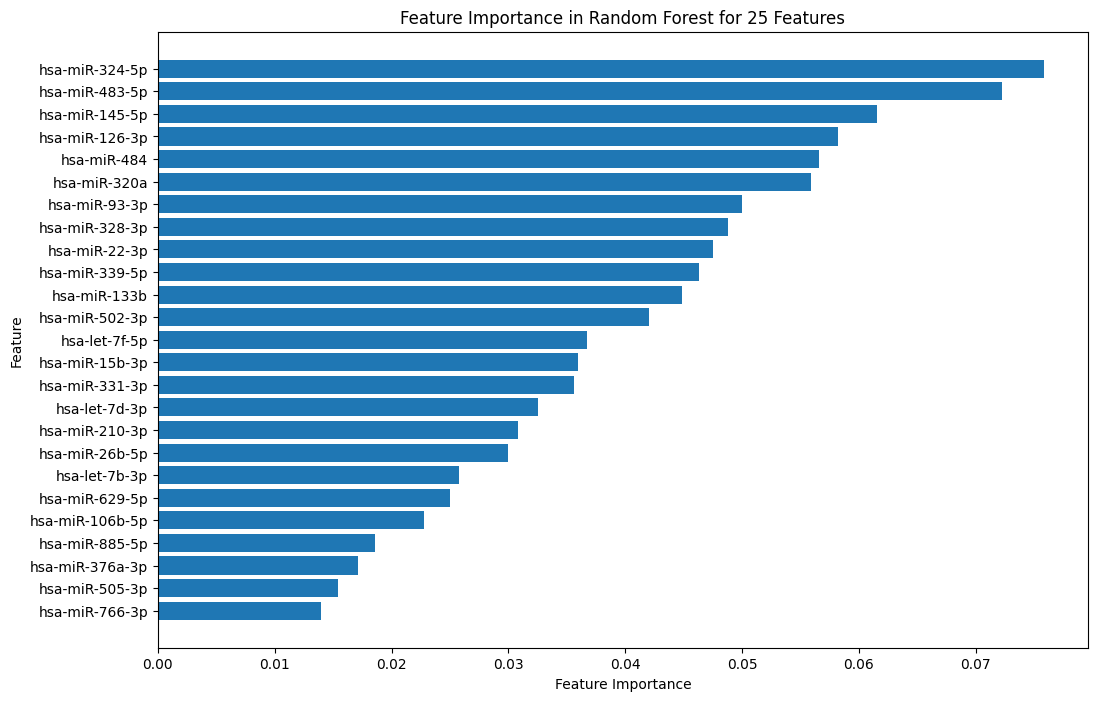

In [27]:
# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_feature_importances_25)), sorted_feature_importances_25, align='center')
plt.yticks(range(len(sorted_feature_importances_25)), sorted_feature_names_25)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest for 25 Features')
plt.show()

In [28]:
# try for k = 5 in k-fold cross validation

In [29]:
from sklearn.model_selection import cross_val_score, KFold

print("5-fold Cross Validation")

# assign the model built earlier to variable model
model = rf_classifier_25

# Define the number of folds (k) for cross-validation
k = 5

# Create a cross-validation object (K-Fold cross-validator)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the cross-validation scores
# we use accuracy as the scoring metric here
scores = cross_val_score(model, X_new_25, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Accuracy: {round(scores.mean()*100, 3)}%")
print(f"Standard Deviation: {round(scores.std()*100, 3)}%")

5-fold Cross Validation
Cross-Validation Scores: [0.77777778 0.77777778 0.61111111 0.5        0.55555556]
Mean Accuracy: 64.444%
Standard Deviation: 11.44%


In [30]:
# try for k = 8 in k-fold cross validation

In [31]:
from sklearn.model_selection import cross_val_score, KFold

print("8-fold Cross Validation")

# assign the model built earlier to variable model
model = rf_classifier_25

# Define the number of folds (k) for cross-validation
k = 8

# Create a cross-validation object (K-Fold cross-validator)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the cross-validation scores
# we use accuracy as the scoring metric here
scores = cross_val_score(model, X_new_25, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Accuracy: {round(scores.mean()*100, 3)}%")
print(f"Standard Deviation: {round(scores.std()*100, 3)}%")

8-fold Cross Validation
Cross-Validation Scores: [0.83333333 0.66666667 1.         0.81818182 0.63636364 0.54545455
 0.72727273 0.54545455]
Mean Accuracy: 72.159%
Standard Deviation: 14.65%


In [32]:
# try for k = 10 in k-fold cross validation

In [33]:
from sklearn.model_selection import cross_val_score, KFold

print("10-fold Cross Validation")

# assign the model built earlier to variable model
model = rf_classifier_25

# Define the number of folds (k) for cross-validation
k = 10

# Create a cross-validation object (K-Fold cross-validator)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the cross-validation scores
# we use accuracy as the scoring metric here
scores = cross_val_score(model, X_new_25, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Accuracy: {round(scores.mean()*100, 3)}%")
print(f"Standard Deviation: {round(scores.std()*100, 3)}%")

10-fold Cross Validation
Cross-Validation Scores: [0.77777778 0.77777778 0.66666667 0.88888889 1.         0.44444444
 0.22222222 0.66666667 0.55555556 0.55555556]
Mean Accuracy: 65.556%
Standard Deviation: 21.344%


In [34]:
# try with 15 features selected using mutual information

In [35]:
# feature selection using mutual information
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# mutual information selector
mi_classi_15 = SelectKBest(score_func=mutual_info_classif, k=15)

# apply the mutual information selector on the dataset
X_MI_15 = mi_classi_15.fit_transform(X, y)

# get the selected 15 features
selected_features_15 = mi_classi_15.get_support()

# feature names of selected features
selected_feature_names_15 = X.columns[selected_features_15]

X_new_15 = X[selected_feature_names_15]

print("Shape of X_new_15: ", X_new_15.shape)

# divide the dataset to train 0.8 and test 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new_15, y, test_size=0.2, random_state=42)

# create Random Forest classifier and train the data
from sklearn.ensemble import RandomForestClassifier
rf_classifier_15 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_15.fit(X_train, y_train)

# test the model on test set
y_pred_15 = rf_classifier_15.predict(X_test)

# evaluate the model using accuracy, classification_report and sensitivity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# let's check the accuracy of the model
accuracy_rf_15_MI = accuracy_score(y_test, y_pred_15)
print(f"Accuracy of the MI 15 Random Forest model is: {round(accuracy_rf_15_MI*100, 3)}%")

# confusion matrix of the model
confusion_matrix_rf_15_MI = confusion_matrix(y_test, y_pred_15)

TP_rf_15 = confusion_matrix_rf_15_MI[1, 1]  # True Positives
FN_rf_15 = confusion_matrix_rf_15_MI[1, 0]  # False Negatives

# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity_rf_15 = TP_rf_15 / (TP_rf_15 + FN_rf_15)
print(f"Sensitivity for 15 features and Random Forest model (True Positive Rate): {round(sensitivity_rf_15*100, 3)}%")

# print the confusion matrix
print("Confusion matrix of the MI 15 Random Forest model is: ")
print(confusion_matrix_rf_15_MI)

# classification report for the
report_rf_15 = classification_report(y_test, y_pred_15)
print("Classification report of MI 15 Random Forest model is: ")
print(report_rf_15)

Shape of X_new_15:  (90, 15)
Accuracy of the MI 15 Random Forest model is: 72.222%
Sensitivity for 15 features and Random Forest model (True Positive Rate): 90.909%
Confusion matrix of the MI 15 Random Forest model is: 
[[ 3  4]
 [ 1 10]]
Classification report of MI 15 Random Forest model is: 
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.71      0.91      0.80        11

    accuracy                           0.72        18
   macro avg       0.73      0.67      0.67        18
weighted avg       0.73      0.72      0.70        18



In [36]:
# Get feature importances
feature_importances_15 = rf_classifier_15.feature_importances_

In [37]:
# Create a list of (feature_name, feature_importance) tuples
feature_importance_tuples_15 = [(feature_name, importance) for feature_name, importance in zip(selected_feature_names_15, feature_importances_15)]

# Sort the list of tuples by feature importance in ascending order
sorted_feature_importance_tuples_15 = sorted(feature_importance_tuples_15, key=lambda x: x[1])

# Extract the sorted feature indices and importances
sorted_feature_names_15, sorted_feature_importances_15 = zip(*sorted_feature_importance_tuples_15)

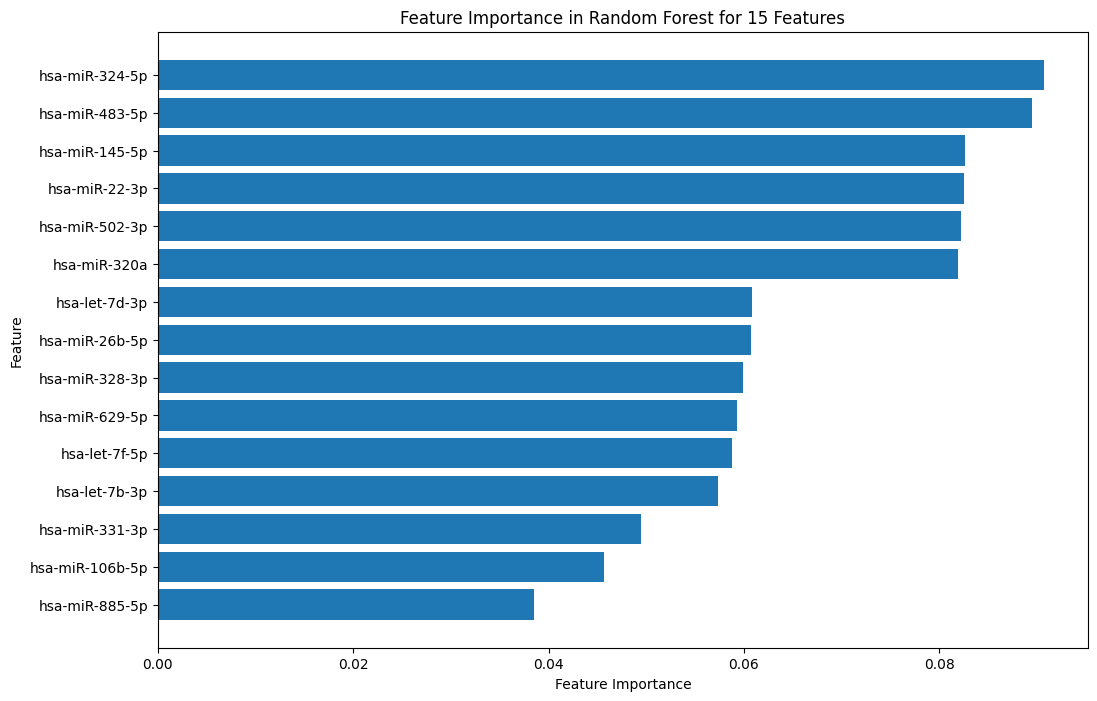

In [38]:
# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_feature_importances_15)), sorted_feature_importances_15, align='center')
plt.yticks(range(len(sorted_feature_importances_15)), sorted_feature_names_15)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest for 15 Features')
plt.show()

In [39]:
# try for k = 5 in k-fold cross validation

In [40]:
from sklearn.model_selection import cross_val_score, KFold

print("5-fold Cross Validation")

# assign the model built earlier to variable model
model = rf_classifier_15

# Define the number of folds (k) for cross-validation
k = 5

# Create a cross-validation object (K-Fold cross-validator)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the cross-validation scores
# we use accuracy as the scoring metric here
scores = cross_val_score(model, X_new_15, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Accuracy: {round(scores.mean()*100, 3)}%")
print(f"Standard Deviation: {round(scores.std()*100, 3)}%")

5-fold Cross Validation
Cross-Validation Scores: [0.83333333 0.66666667 0.66666667 0.5        0.55555556]
Mean Accuracy: 64.444%
Standard Deviation: 11.44%


In [41]:
# try for k = 8 in k-fold cross validation

In [42]:
from sklearn.model_selection import cross_val_score, KFold

print("8-fold Cross Validation")

# assign the model built earlier to variable model
model = rf_classifier_15

# Define the number of folds (k) for cross-validation
k = 8

# Create a cross-validation object (K-Fold cross-validator)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the cross-validation scores
# we use accuracy as the scoring metric here
scores = cross_val_score(model, X_new_15, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Accuracy: {round(scores.mean()*100, 3)}%")
print(f"Standard Deviation: {round(scores.std()*100, 3)}%")

8-fold Cross Validation
Cross-Validation Scores: [0.91666667 0.58333333 1.         0.90909091 0.63636364 0.36363636
 0.81818182 0.63636364]
Mean Accuracy: 73.295%
Standard Deviation: 20.025%


In [43]:
# try for k = 10 in k-fold cross validation

In [44]:
from sklearn.model_selection import cross_val_score, KFold

print("10-fold Cross Validation")

# assign the model built earlier to variable model
model = rf_classifier_15

# Define the number of folds (k) for cross-validation
k = 10

# Create a cross-validation object (K-Fold cross-validator)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the cross-validation scores
# we use accuracy as the scoring metric here
scores = cross_val_score(model, X_new_15, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Accuracy: {round(scores.mean()*100, 3)}%")
print(f"Standard Deviation: {round(scores.std()*100, 3)}%")

10-fold Cross Validation
Cross-Validation Scores: [0.77777778 0.77777778 0.77777778 0.88888889 1.         0.66666667
 0.22222222 0.33333333 0.55555556 0.77777778]
Mean Accuracy: 67.778%
Standard Deviation: 23.014%
